In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [41]:
df=pd.read_csv('harvest_data.csv')
df.head()

,Province,Year,Crop,Harvest_Tons
0,Central,2010,Rice,217621
1,Central,2010,Tea,24592
2,Central,2010,Coconut,23278
3,Central,2010,Rubber,23024
4,Central,2010,Vegetables,42098


C:\Users\induw\AppData\Local\Temp\ipykernel_8320\1978733818.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Province',y='Harvest_Tons',data=province_total,palette="Set2")


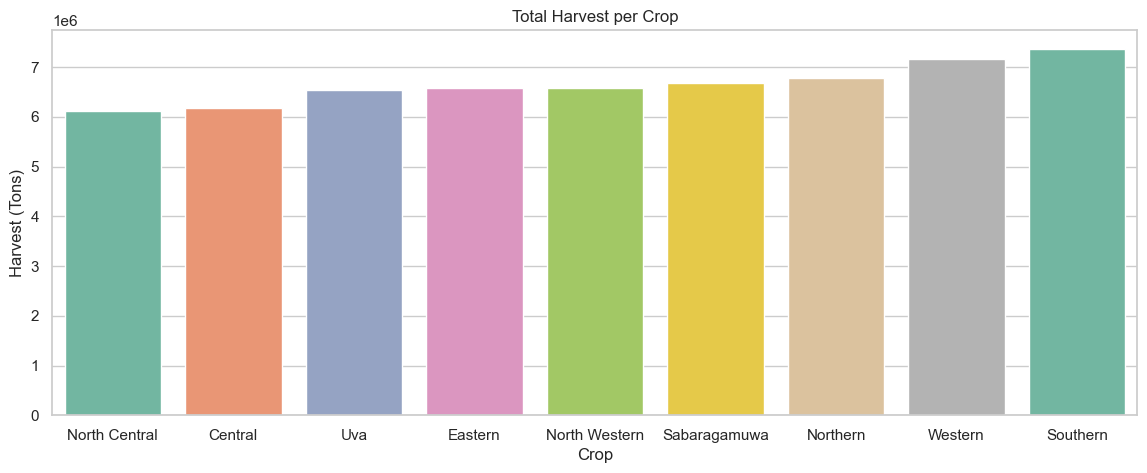

In [50]:
## Total Harvest per Province
province_total=df.groupby('Province')['Harvest_Tons'].sum().reset_index()
province_total=province_total.sort_values(by='Harvest_Tons',ascending=True)


plt.figure(figsize=(14,5))
sns.barplot(x='Province',y='Harvest_Tons',data=province_total,palette="Set2")
plt.title("Total Harvest per Crop")
plt.ylabel("Harvest (Tons)")
plt.xlabel("Crop")
plt.show()


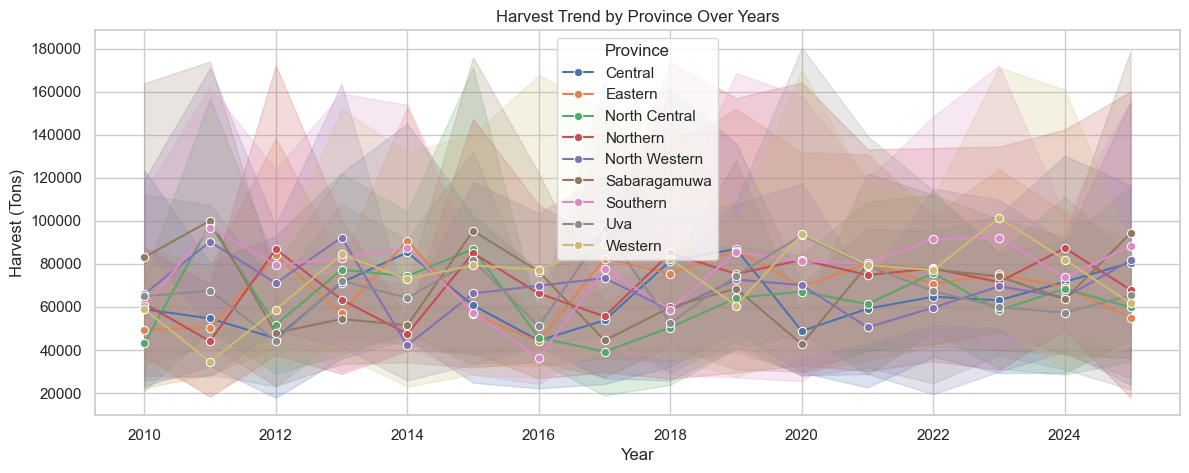

In [51]:
## Harvest Trends Over Years

plt.figure(figsize=(14,5))
sns.lineplot(x='Year',y='Harvest_Tons',hue='Province',data=df,marker="o")
plt.title("Harvest Trend by Province Over Years")
plt.ylabel("Harvest (Tons)")
plt.xlabel("Year")
plt.legend(title="Province")
plt.show()

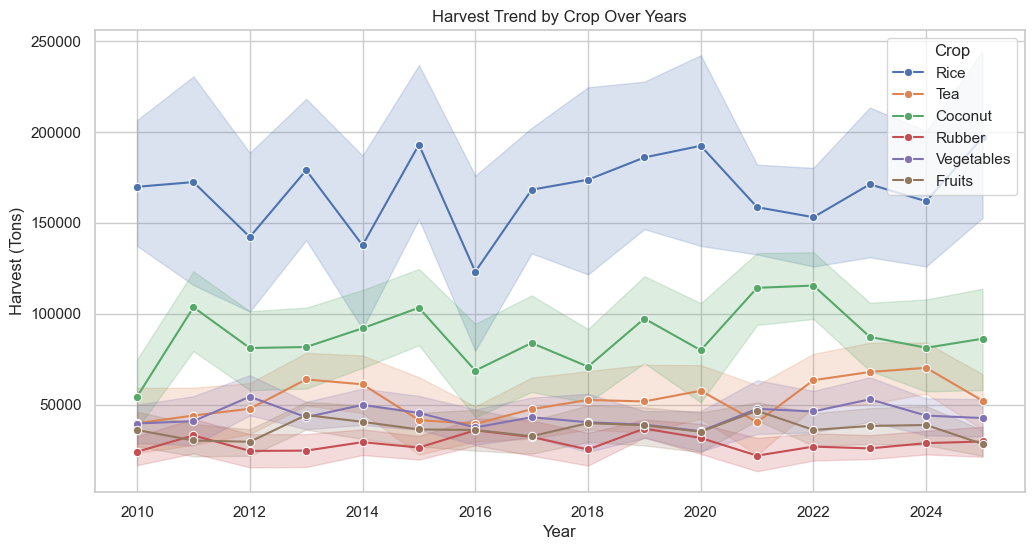

In [52]:
## Crop Trend Over Years

plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Harvest_Tons", hue="Crop", data=df, marker="o")
plt.title("Harvest Trend by Crop Over Years")
plt.ylabel("Harvest (Tons)")
plt.xlabel("Year")
plt.legend(title="Crop")
plt.show()

In [ ]:
## Top 3 Provinces per Crop

for crop in df['Crop'].unique():
    top_provinces = df[df['Crop']==crop].groupby("Province")["Harvest_Tons"].sum().sort_values(ascending=False).head(3)
    print(f"Top 3 provinces for {crop}:\n{top_provinces}\n")


Top 3 provinces for Rice:
Province
Northern    3136618
Southern    3130545
Western     2991386
Name: Harvest_Tons, dtype: int64

Top 3 provinces for Tea:
Province
Sabaragamuwa     1033011
Southern          921458
North Central     911296
Name: Harvest_Tons, dtype: int64

Top 3 provinces for Coconut:
Province
Uva              1642347
North Western    1566475
Western          1520185
Name: Harvest_Tons, dtype: int64

Top 3 provinces for Rubber:
Province
Western          536036
Uva              518038
North Central    473438
Name: Harvest_Tons, dtype: int64

Top 3 provinces for Vegetables:
Province
Sabaragamuwa    816633
Eastern         767688
Southern        759765
Name: Harvest_Tons, dtype: int64

Top 3 provinces for Fruits:
Province
North Western    685281
Eastern          683217
Southern         603531
Name: Harvest_Tons, dtype: int64



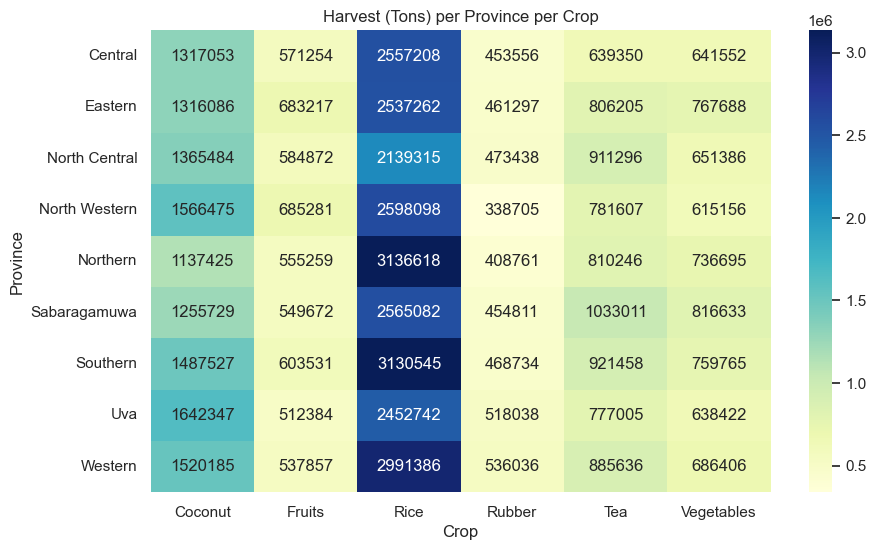

In [54]:
pivot = df.pivot_table(values="Harvest_Tons", index="Province", columns="Crop", aggfunc="sum")

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Harvest (Tons) per Province per Crop")
plt.show()


In [55]:
df_sorted = df.sort_values(["Province", "Year"])
df_sorted["Prev_Year_Harvest"] = df_sorted.groupby("Province")["Harvest_Tons"].shift(1)
df_sorted["Growth_%"] = ((df_sorted["Harvest_Tons"] - df_sorted["Prev_Year_Harvest"]) / df_sorted["Prev_Year_Harvest"])*100

df_sorted.head(10)


,Province,Year,Crop,Harvest_Tons,Prev_Year_Harvest,Growth_%
0,Central,2010,Rice,217621,NaN,NaN
1,Central,2010,Tea,24592,217621.0,-88.699620
2,Central,2010,Coconut,23278,24592.0,-5.343201
3,Central,2010,Rubber,23024,23278.0,-1.091159
4,Central,2010,Vegetables,42098,23024.0,82.843989
5,Central,2010,Fruits,22628,42098.0,-46.249228
6,Central,2011,Rice,86579,22628.0,282.618879
7,Central,2011,Tea,23434,86579.0,-72.933390
8,Central,2011,Coconut,108696,23434.0,363.838867
9,Central,2011,Rubber,40741,108696.0,-62.518400


C:\Users\induw\AppData\Local\Temp\ipykernel_8320\42251474.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_growth.index, y=top_growth.values, palette="coolwarm")


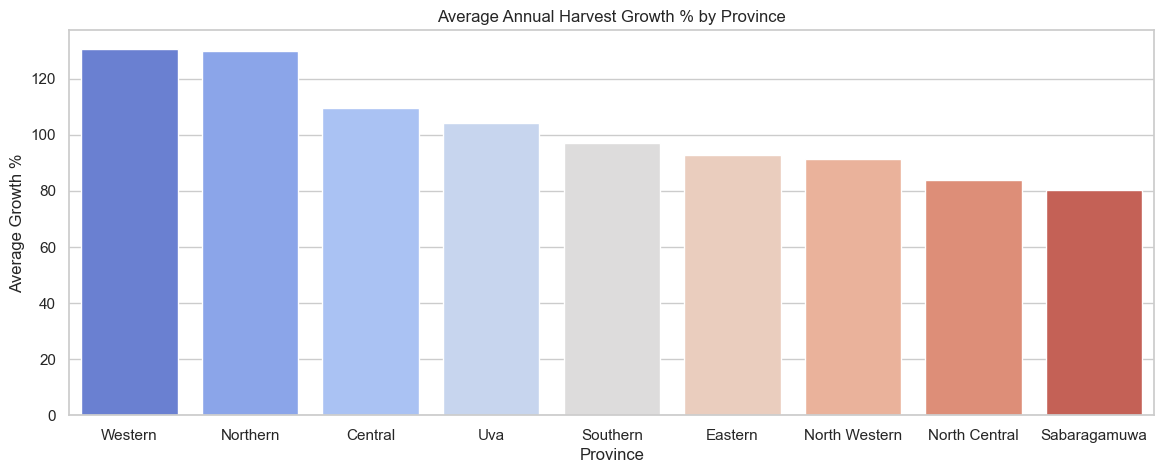

In [57]:
top_growth = df_sorted.groupby("Province")["Growth_%"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,5))
sns.barplot(x=top_growth.index, y=top_growth.values, palette="coolwarm")
plt.title("Average Annual Harvest Growth % by Province")
plt.ylabel("Average Growth %")
plt.xlabel("Province")
plt.show()
